In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats
from mnist.loader import MNIST

mnist_input_data_path = "C:/Users/Joseph Hwang/Desktop/MNIST/MNIST_data"
mndata = MNIST(mnist_input_data_path)
train_images, train_labels = mndata.load_training()

def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

def add_to_list(label, df):
    list_name = "label" + str(label)
    if list_name == "label0":
        label0.append(df)
    elif list_name == "label1":
        label1.append(df)
    elif list_name == "label2":
        label2.append(df)
    elif list_name == "label3":
        label3.append(df)
    elif list_name == "label4":
        label4.append(df)
    elif list_name == "label5":
        label5.append(df)
    elif list_name == "label6":
        label6.append(df)
    elif list_name == "label7":
        label7.append(df)
    elif list_name == "label8":
        label8.append(df)
    elif list_name == "label9":
        label9.append(df)
    else:
        return

label0 = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
label6 = []
label7 = []
label8 = []
label9 = []

label_index = 1

#Read specified output file(s)
for z in range(1, 3): #range(1, 101) for all sample outputs given. For this case, only 1 simulation. 
    #print("Sample Output:", z)
    with open("C:/Users/Joseph Hwang/Desktop/Sample_Output_Practice/" + str(z) + ".out") as infile:
        for i in range(36):
            next(infile)
        for line in infile:
            sourcefile = infile.read()

    sourcefile_list = sourcefile.split("\n")
    
    #create DataFrame where row = edge, column = time.
    y = 0
    edge_weights = []
    df = pd.DataFrame([])
    time = sourcefile_list[0][131:]

    for x in range(len(sourcefile_list)):
        if "Edge From Node" in sourcefile_list[x]:
            if time in sourcefile_list[x][131:]:
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
            else:
                column_values = pd.Series(edge_weights)
                df.insert(loc=y, column=time, value=column_values)
                edge_weights.clear()
                time = sourcefile_list[x][131:]
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
                y+=1
    column_values = pd.Series(edge_weights)
    df.insert(loc=y, column=time, value=column_values)
    
    #Transpose DataFrame so that row = time, column = edge weight.
    df2 = df.T
    df2.insert(loc=0, column="time", value=df2.index)

    converted = []
    edge = []

    list = df2[df2.columns[0]]

    for x in range(len(list)):
        converted.append(float(list[x]))
    
    #create a graph showing edge weights over time for a single edge
    x = np.array(converted) 
    upper_limit = len(df2.columns)
    slope = []
    intercept = []

    for z in range(1, upper_limit):
        y = np.array(df2[df2.columns[z]])
        #plt.plot(x, y)
        m, b = np.polyfit(x, y, 1) #linear regression to find slope of graph
        #plt.plot(x, m*x + b)
        slope.append(m)
        intercept.append(b)
        edge.append(z)

    #DataFrame containing columns: edge, slope, and intercept
    df3 = pd.DataFrame([])
    df3.insert(loc=0, column="edge", value=edge)
    df3.insert(loc=1, column="slope", value=slope)
    df3.insert(loc=2, column="intercept", value=intercept)
    
    #sort each output dataframe to a certain label
    label = train_labels[label_index]
    add_to_list(label, df3)
    label_index+=1

In [2]:
df2

,time,0,1,2,3,4,5,6,7,8,...,80,81,82,83,84,85,86,87,88,89
0.0000000000000000000000,0.0000000000000000000000,1.303237,1.683592,-0.698580,-0.566867,0.744900,1.486724,0.154904,0.543239,1.974333,...,1.744983,0.842408,1.673343,0.593723,1.147023,0.724469,0.131374,0.710077,-0.595289,1.153353
0.1000000000000000055511,0.1000000000000000055511,1.303237,1.683592,-0.698580,-0.566867,0.744900,1.486724,0.154904,0.543239,1.974333,...,1.744983,0.842408,1.673343,0.593723,1.147023,0.724469,0.131374,0.710077,-0.595289,1.153353
0.2000000000000000111022,0.2000000000000000111022,1.303237,1.683592,-0.698580,-0.566867,0.744900,1.486724,0.154904,0.543239,1.974333,...,1.744983,0.842408,1.673343,0.593723,1.147023,0.724469,0.131374,0.710077,-0.595289,1.153353
0.3000000000000000444089,0.3000000000000000444089,1.303240,1.683545,-0.698580,-0.566877,0.744900,1.486724,0.154904,0.543245,1.974138,...,1.744906,0.842408,1.673320,0.593723,1.147026,0.724450,0.131359,0.710077,-0.595289,1.153331
0.4000000000000000222045,0.4000000000000000222045,1.303193,1.683504,-0.698565,-0.566826,0.744896,1.486559,0.154858,0.543244,1.974056,...,1.744754,0.842348,1.673172,0.593756,1.146889,0.724380,0.131404,0.710077,-0.595267,1.153186
0.5000000000000000000000,0.5000000000000000000000,1.303169,1.683252,-0.698506,-0.566784,0.744845,1.486500,0.154857,0.543272,1.973973,...,1.744657,0.842227,1.673076,0.593794,1.146837,0.724281,0.131397,0.710060,-0.595244,1.153111
0.5999999999999999777955,0.5999999999999999777955,1.303009,1.683085,-0.698494,-0.566762,0.744780,1.486346,0.154863,0.543224,1.973808,...,1.744454,0.842127,1.672874,0.593737,1.146750,0.724313,0.131397,0.710087,-0.595251,1.152974
0.6999999999999999555911,0.6999999999999999555911,1.302901,1.682863,-0.698519,-0.566770,0.744700,1.486198,0.154809,0.543252,1.973642,...,1.744254,0.842050,1.672675,0.593675,1.146639,0.724272,0.131330,0.710028,-0.595299,1.152855
0.7999999999999999333866,0.7999999999999999333866,1.302661,1.682586,-0.698485,-0.566788,0.744664,1.486100,0.154755,0.543115,1.973365,...,1.743974,0.841816,1.672476,0.593599,1.146454,0.724145,0.131233,0.710008,-0.595336,1.152772
0.8999999999999999111822,0.8999999999999999111822,1.302504,1.682257,-0.698589,-0.566735,0.744561,1.485979,0.154678,0.543119,1.973115,...,1.743637,0.841587,1.672307,0.593547,1.146331,0.724004,0.131143,0.709828,-0.595402,1.152546


In [88]:
label1[1].memory_usage(index=True).sum() / 10**6

0.237728

In [1]:
#DataFrame where columns are edge# and average slope
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label0[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    #for x in range(len(label0)):
    for x in range(len(label0)):
        sum = sum + float(label0[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label0.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label1[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label1)):
        sum = sum + float(label1[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label1.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label2[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label2)):
        sum = sum + float(label2[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label2.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label5[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label3)):
        sum = sum + float(label3[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label3.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label4[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label4)):
        sum = sum + float(label4[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label4.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label5[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label5)):
        sum = sum + float(label5[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label5.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label6[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label6)):
        sum = sum + float(label6[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label6.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label7[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label7)):
        sum = sum + float(label7[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label7.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label8[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label8)):
        sum = sum + float(label8[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label8.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label9[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label9)):
        sum = sum + float(label9[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label9.append(df4)

NameError: name 'pd' is not defined

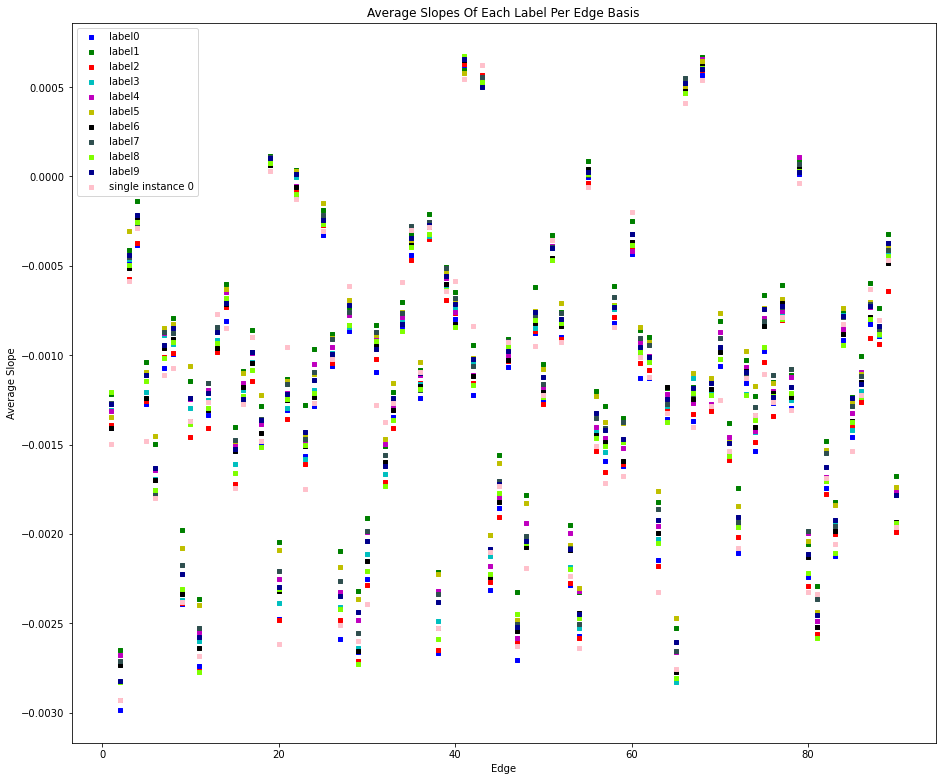

In [44]:
import matplotlib.pyplot as plt

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig = plt.figure()
ax1 = fig.add_subplot(111)
var = 0

ax1.scatter(np.array(label0[len(label0) - 1]["Edge"]), np.array(label0[len(label0) - 1]["Average Slope"]), s=10, c='b', marker="s", label='label0')
ax1.scatter(np.array(label1[len(label1) - 1]["Edge"]), np.array(label1[len(label1) - 1]["Average Slope"]), s=10, c='g', marker="s", label='label1')
ax1.scatter(np.array(label2[len(label2) - 1]["Edge"]), np.array(label2[len(label2) - 1]["Average Slope"]), s=10, c='r', marker="s", label='label2')
ax1.scatter(np.array(label3[len(label3) - 1]["Edge"]), np.array(label3[len(label3) - 1]["Average Slope"]), s=10, c='c', marker="s", label='label3')
ax1.scatter(np.array(label4[len(label4) - 1]["Edge"]), np.array(label4[len(label4) - 1]["Average Slope"]), s=10, c='m', marker="s", label='label4')
ax1.scatter(np.array(label5[len(label5) - 1]["Edge"]), np.array(label5[len(label5) - 1]["Average Slope"]), s=10, c='y', marker="s", label='label5')
ax1.scatter(np.array(label6[len(label6) - 1]["Edge"]), np.array(label6[len(label6) - 1]["Average Slope"]), s=10, c='k', marker="s", label='label6')
ax1.scatter(np.array(label7[len(label7) - 1]["Edge"]), np.array(label7[len(label7) - 1]["Average Slope"]), s=10, c='DarkSlateGray', marker="s", label='label7')
ax1.scatter(np.array(label8[len(label8) - 1]["Edge"]), np.array(label8[len(label8) - 1]["Average Slope"]), s=10, c='chartreuse', marker="s", label='label8')
ax1.scatter(np.array(label9[len(label9) - 1]["Edge"]), np.array(label9[len(label9) - 1]["Average Slope"]), s=10, c='DarkBlue', marker="s", label='label9')
ax1.scatter(np.array(label0[var]["edge"]), np.array(label0[var]["slope"]), s=10, c="Pink", marker="s", label="single instance 0")
set_size(12,10)
plt.title("Average Slopes Of Each Label Per Edge Basis")
plt.xlabel("Edge")
plt.ylabel("Average Slope")
plt.legend(loc='upper left');
#plt.savefig('AvrgSlopeVsEdge.jpeg', bbox_inches='tight', dpi=500)
plt.show()

In [36]:
label0[0]["edge"]

0      1
1      2
2      3
3      4
4      5
      ..
85    86
86    87
87    88
88    89
89    90
Name: edge, Length: 90, dtype: int64

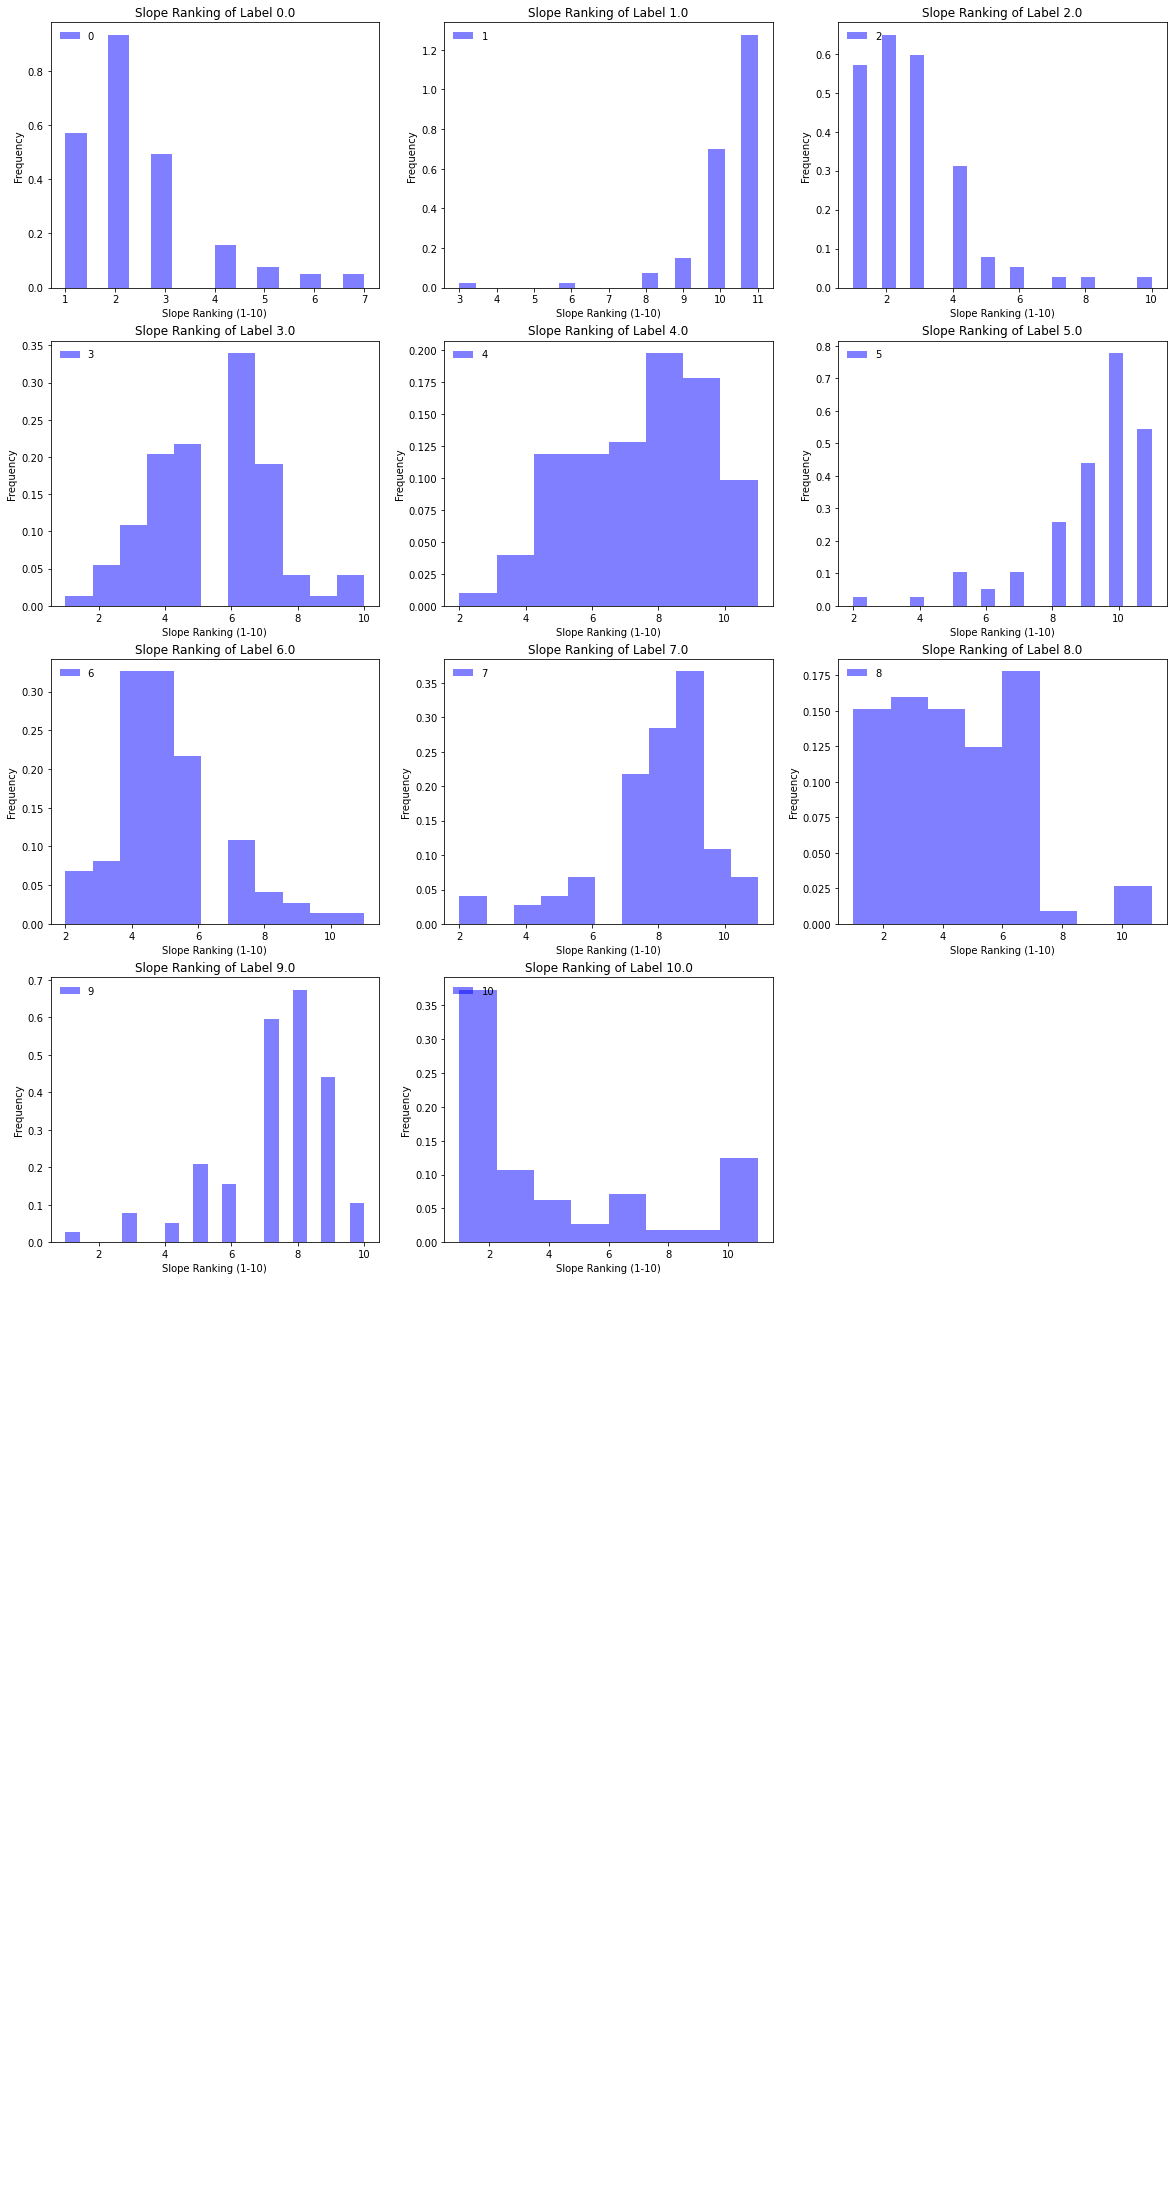

In [55]:
compare = pd.DataFrame([])
compare.insert(loc=0, column="Label 0", value=np.array(label0[len(label0) - 1]["Average Slope"]))
compare.insert(loc=1, column="Label 1", value=np.array(label1[len(label1) - 1]["Average Slope"]))
compare.insert(loc=2, column="Label 2", value=np.array(label2[len(label2) - 1]["Average Slope"]))
compare.insert(loc=3, column="Label 3", value=np.array(label3[len(label3) - 1]["Average Slope"]))
compare.insert(loc=4, column="Label 4", value=np.array(label4[len(label4) - 1]["Average Slope"]))
compare.insert(loc=5, column="Label 5", value=np.array(label5[len(label5) - 1]["Average Slope"]))
compare.insert(loc=6, column="Label 6", value=np.array(label6[len(label6) - 1]["Average Slope"]))
compare.insert(loc=7, column="Label 7", value=np.array(label7[len(label7) - 1]["Average Slope"]))
compare.insert(loc=8, column="Label 8", value=np.array(label8[len(label8) - 1]["Average Slope"]))
compare.insert(loc=9, column="Label 9", value=np.array(label9[len(label9) - 1]["Average Slope"]))
compare.insert(loc=10, column="Single instance 0", value=np.array(label0[var]["slope"]))
compare = compare.T
#print(compare)
#print(compare[1].rank())
ranking = pd.DataFrame([])
for x in range(len(compare.columns)):
    ranking.insert(loc=x, column="Edge " + str(x + 1), value=np.array(compare[x].rank()))
ranking = ranking.T

ncols = 3
#nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))

counter = 0
a = []
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(ranking.columns):
            ax.hist(ranking[ranking.columns[counter]], bins='auto', color='blue', alpha=0.5, label='{}'.format(ranking.columns[counter]), density=True)
            temp, b = np.histogram(ranking[ranking.columns[counter]], bins=np.arange(11), density=True)
            a.append(temp)
            #numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
            ax.set_xlabel('Slope Ranking (1-10)')
            ax.set_ylabel('Frequency')
            ax.set_title("Slope Ranking of Label " + str(truncate(float(ranking.columns[counter]), 0)))
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)
        else:
            ax.set_axis_off()
        counter+=1
plt.show()

In [66]:
def kl_divergence(p, q):
    s = 0
    for i in range(len(p)):
        if (p[i] != 0 and q[i] != 0):
            s = p[i] * np.log(p[i] / q[i]) + s
    return s

In [70]:
#kl_divergence(a[10], a[0])
for i in range(10):
    print(i, kl_divergence(a[i], a[10]))
    

0 0.4457884862672883
1 2.0406441004013933
2 0.2827359897890644
3 0.9057973058016698
4 1.2914668666704137
5 1.6289313694529493
6 1.0223243926629006
7 1.4054169708184745
8 0.474831440152416
9 1.3399705192801674


In [26]:
compare

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Label 0,-0.001405,-0.002985,-0.000492,-0.000386,-0.001274,-0.001754,-0.001073,-0.000991,-0.002389,-0.001370,...,-0.002522,-0.001743,-0.002126,-0.000914,-0.001457,-0.001255,-0.000823,-0.000893,-0.000472,-0.001981
Label 1,-0.001218,-0.002648,-0.000414,-0.000137,-0.001040,-0.001495,-0.000868,-0.000790,-0.001978,-0.001147,...,-0.002293,-0.001480,-0.001823,-0.000761,-0.001232,-0.001004,-0.000594,-0.000737,-0.000321,-0.001677
Label 2,-0.001391,-0.002929,-0.000576,-0.000372,-0.001255,-0.001700,-0.001009,-0.000987,-0.002386,-0.001455,...,-0.002557,-0.001775,-0.001998,-0.000880,-0.001399,-0.001263,-0.000904,-0.000939,-0.000640,-0.001988
Label 3,-0.001309,-0.002718,-0.000460,-0.000282,-0.001207,-0.001695,-0.000885,-0.000935,-0.002369,-0.001295,...,-0.002485,-0.001695,-0.001940,-0.000776,-0.001415,-0.001199,-0.000797,-0.000889,-0.000436,-0.001960
Label 4,-0.001312,-0.002678,-0.000438,-0.000268,-0.001103,-0.001643,-0.000873,-0.000828,-0.002319,-0.001245,...,-0.002485,-0.001683,-0.001985,-0.000851,-0.001321,-0.001095,-0.000729,-0.000845,-0.000374,-0.001767
Label 5,-0.001347,-0.002710,-0.000302,-0.000227,-0.001094,-0.001454,-0.000850,-0.000827,-0.002077,-0.001062,...,-0.002437,-0.001531,-0.001835,-0.000735,-0.001265,-0.001106,-0.000701,-0.000873,-0.000391,-0.001737
Label 6,-0.001409,-0.002732,-0.000511,-0.000225,-0.001241,-0.001698,-0.000961,-0.000910,-0.002337,-0.001367,...,-0.002520,-0.001701,-0.001984,-0.000879,-0.001366,-0.001152,-0.000785,-0.000879,-0.000483,-0.001935
Label 7,-0.001266,-0.002709,-0.000448,-0.000266,-0.001113,-0.001777,-0.000871,-0.000877,-0.002175,-0.001239,...,-0.002364,-0.001546,-0.001953,-0.000784,-0.001284,-0.001113,-0.000713,-0.000857,-0.000409,-0.001784
Label 8,-0.001205,-0.002827,-0.000497,-0.000253,-0.001144,-0.001755,-0.001014,-0.000927,-0.002305,-0.001386,...,-0.002580,-0.001705,-0.002104,-0.000945,-0.001375,-0.001234,-0.000798,-0.000880,-0.000443,-0.001941
Label 9,-0.001271,-0.002820,-0.000438,-0.000214,-0.001111,-0.001632,-0.000941,-0.000850,-0.002226,-0.001238,...,-0.002456,-0.001626,-0.001920,-0.000783,-0.001239,-0.001160,-0.000724,-0.000838,-0.000372,-0.001782


In [27]:
ranking

,0,1,2,3,4,5,6,7,8,9
Edge 1,2.0,9.0,3.0,6.0,5.0,4.0,1.0,8.0,10.0,7.0
Edge 2,1.0,10.0,2.0,6.0,9.0,7.0,5.0,8.0,3.0,4.0
Edge 3,4.0,9.0,1.0,5.0,8.0,10.0,2.0,6.0,3.0,7.0
Edge 4,1.0,10.0,2.0,3.0,4.0,7.0,8.0,5.0,6.0,9.0
Edge 5,1.0,10.0,2.0,4.0,8.0,9.0,3.0,6.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...
Edge 86,2.0,10.0,1.0,4.0,9.0,8.0,6.0,7.0,3.0,5.0
Edge 87,2.0,10.0,1.0,4.0,6.0,9.0,5.0,8.0,3.0,7.0
Edge 88,2.0,10.0,1.0,3.0,8.0,6.0,5.0,7.0,4.0,9.0
Edge 89,3.0,10.0,1.0,5.0,8.0,7.0,2.0,6.0,4.0,9.0


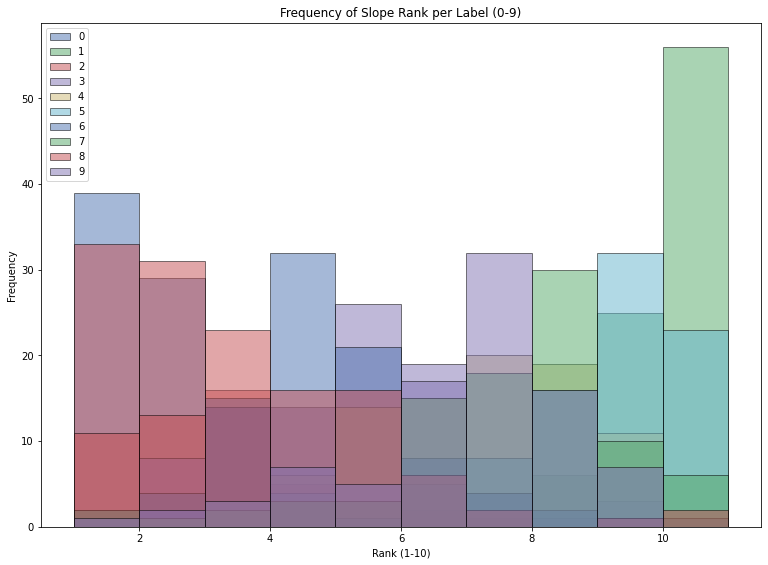

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
bins = np.linspace(1, 11, 11)

plt.hist(ranking[ranking.columns[0]], bins, alpha=0.5, label='{}'.format(ranking.columns[0]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[1]], bins, alpha=0.5, label='{}'.format(ranking.columns[1]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[2]], bins, alpha=0.5, label='{}'.format(ranking.columns[2]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[3]], bins, alpha=0.5, label='{}'.format(ranking.columns[3]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[4]], bins, alpha=0.5, label='{}'.format(ranking.columns[4]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[5]], bins, alpha=0.5, label='{}'.format(ranking.columns[5]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[6]], bins, alpha=0.5, label='{}'.format(ranking.columns[6]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[7]], bins, alpha=0.5, label='{}'.format(ranking.columns[7]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[8]], bins, alpha=0.5, label='{}'.format(ranking.columns[8]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[9]], bins, alpha=0.5, label='{}'.format(ranking.columns[9]), edgecolor = 'k')
set_size(10,7)

plt.title("Frequency of Slope Rank per Label (0-9)")
plt.xlabel("Rank (1-10)")
plt.ylabel("Frequency")

plt.legend(loc='upper left')
plt.show()

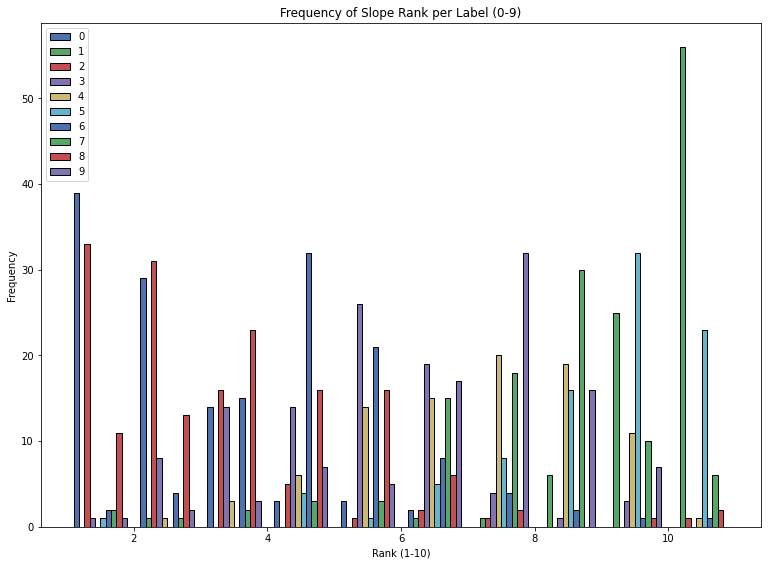

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')
bins = np.linspace(1, 11, 11)

plt.hist([ranking[ranking.columns[0]],
          ranking[ranking.columns[1]],
          ranking[ranking.columns[2]],
          ranking[ranking.columns[3]],
          ranking[ranking.columns[4]],
          ranking[ranking.columns[5]],
          ranking[ranking.columns[6]],
          ranking[ranking.columns[7]],
          ranking[ranking.columns[8]],
          ranking[ranking.columns[9]]],
          bins, label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], edgecolor = 'k')
plt.legend(loc='upper left')
plt.title("Frequency of Slope Rank per Label (0-9)")
plt.xlabel("Rank (1-10)")
plt.ylabel("Frequency")
set_size(10,7)
plt.show()

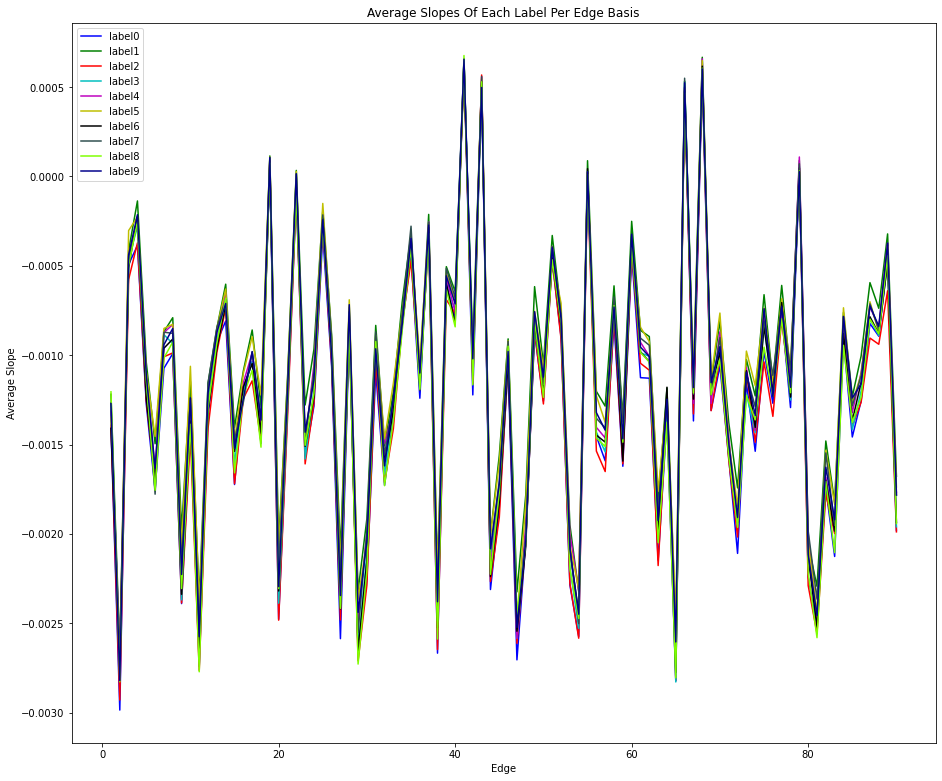

In [30]:
import matplotlib.pyplot as plt

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(np.array(label0[len(label0) - 1]["Edge"]), np.array(label0[len(label0) - 1]["Average Slope"]), c='b', label='label0')
ax1.plot(np.array(label1[len(label1) - 1]["Edge"]), np.array(label1[len(label1) - 1]["Average Slope"]), c='g', label='label1')
ax1.plot(np.array(label2[len(label2) - 1]["Edge"]), np.array(label2[len(label2) - 1]["Average Slope"]), c='r', label='label2')
ax1.plot(np.array(label3[len(label3) - 1]["Edge"]), np.array(label3[len(label3) - 1]["Average Slope"]), c='c', label='label3')
ax1.plot(np.array(label4[len(label4) - 1]["Edge"]), np.array(label4[len(label4) - 1]["Average Slope"]), c='m', label='label4')
ax1.plot(np.array(label5[len(label5) - 1]["Edge"]), np.array(label5[len(label5) - 1]["Average Slope"]), c='y', label='label5')
ax1.plot(np.array(label6[len(label6) - 1]["Edge"]), np.array(label6[len(label6) - 1]["Average Slope"]), c='k', label='label6')
ax1.plot(np.array(label7[len(label7) - 1]["Edge"]), np.array(label7[len(label7) - 1]["Average Slope"]), c='DarkSlateGray', label='label7')
ax1.plot(np.array(label8[len(label8) - 1]["Edge"]), np.array(label8[len(label8) - 1]["Average Slope"]), c='chartreuse', label='label8')
ax1.plot(np.array(label9[len(label9) - 1]["Edge"]), np.array(label9[len(label9) - 1]["Average Slope"]), c='DarkBlue', label='label9')
set_size(12,10)
plt.title("Average Slopes Of Each Label Per Edge Basis")
plt.xlabel("Edge")
plt.ylabel("Average Slope")
plt.legend(loc='upper left');
#plt.savefig('AvrgSlopeVsEdge.jpeg', bbox_inches='tight', dpi=500)
plt.show()

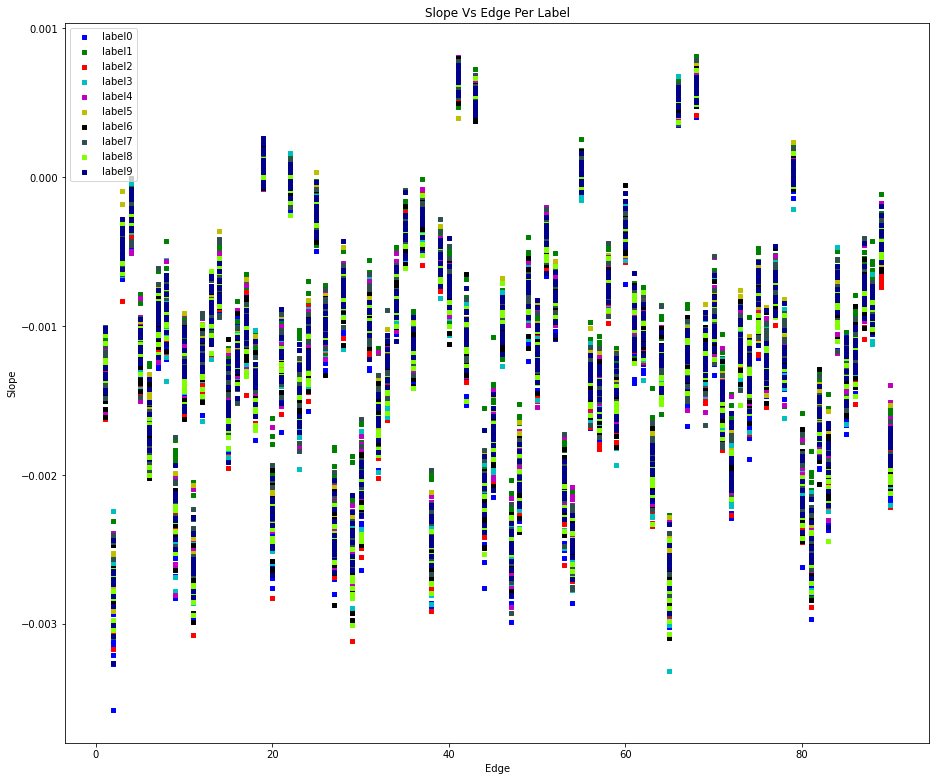

In [31]:
import matplotlib.pyplot as plt

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig = plt.figure()
ax1 = fig.add_subplot(111)

index = 0
for y in range(len(label0[0])):
    for x in range(len(label0) - 1):
        index+=1
        ax1.scatter(np.array(label0[0].iloc[y]["edge"]), np.array(label0[x].iloc[y]["slope"]), s=10, c='b', marker="s", label='label0' if index == 1 else "")

index = 0
for y in range(len(label1[0])):
    for x in range(len(label1) - 1):
        index+=1
        ax1.scatter(np.array(label1[0].iloc[y]["edge"]), np.array(label1[x].iloc[y]["slope"]), s=10, c='g', marker="s", label='label1' if index == 1 else "")
        
index = 0
for y in range(len(label2[0])):
    for x in range(len(label2) - 1):
        index+=1
        ax1.scatter(np.array(label2[0].iloc[y]["edge"]), np.array(label2[x].iloc[y]["slope"]), s=10, c='r', marker="s", label='label2' if index == 1 else "")

index = 0
for y in range(len(label3[0])):
    for x in range(len(label3) - 1):
        index+=1
        ax1.scatter(np.array(label3[0].iloc[y]["edge"]), np.array(label3[x].iloc[y]["slope"]), s=10, c='c', marker="s", label='label3' if index == 1 else "")
        
index = 0
for y in range(len(label4[0])):
    for x in range(len(label4) - 1):
        index+=1
        ax1.scatter(np.array(label4[0].iloc[y]["edge"]), np.array(label4[x].iloc[y]["slope"]), s=10, c='m', marker="s", label='label4' if index == 1 else "")
        
index = 0
for y in range(len(label5[0])):
    for x in range(len(label5) - 1):
        index+=1
        ax1.scatter(np.array(label5[0].iloc[y]["edge"]), np.array(label5[x].iloc[y]["slope"]), s=10, c='y', marker="s", label='label5' if index == 1 else "")
        
index = 0
for y in range(len(label6[0])):
    for x in range(len(label6) - 1):
        index+=1
        ax1.scatter(np.array(label6[0].iloc[y]["edge"]), np.array(label6[x].iloc[y]["slope"]), s=10, c='k', marker="s", label='label6' if index == 1 else "")
        
index = 0
for y in range(len(label7[0])):
    for x in range(len(label7) - 1):
        index+=1
        ax1.scatter(np.array(label7[0].iloc[y]["edge"]), np.array(label7[x].iloc[y]["slope"]), s=10, c='DarkSlateGray', marker="s", label='label7' if index == 1 else "")
        
index = 0
for y in range(len(label8[0])):
    for x in range(len(label8) - 1):
        index+=1
        ax1.scatter(np.array(label8[0].iloc[y]["edge"]), np.array(label8[x].iloc[y]["slope"]), s=10, c='chartreuse', marker="s", label='label8' if index == 1 else "")
        
index = 0
for y in range(len(label9[0])):
    for x in range(len(label9) - 1):
        index+=1
        ax1.scatter(np.array(label9[0].iloc[y]["edge"]), np.array(label9[x].iloc[y]["slope"]), s=10, c='DarkBlue', marker="s", label='label9' if index == 1 else "")
    
set_size(12,10)
plt.title("Slope Vs Edge Per Label")
plt.xlabel("Edge")
plt.ylabel("Slope")
plt.legend(loc='upper left');
#plt.savefig('AvrgSlopeVsEdge.jpeg', bbox_inches='tight', dpi=500)
plt.show()

# 100 Recurrent Node Networks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats
from mnist.loader import MNIST

mnist_input_data_path = "C:/Users/Joseph Hwang/Desktop/MNIST/MNIST_data"
mndata = MNIST(mnist_input_data_path)
train_images, train_labels = mndata.load_training()

def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

def add_to_list(label, df):
    list_name = "label" + str(label)
    if list_name == "label0":
        label0.append(df)
    elif list_name == "label1":
        label1.append(df)
    elif list_name == "label2":
        label2.append(df)
    elif list_name == "label3":
        label3.append(df)
    elif list_name == "label4":
        label4.append(df)
    elif list_name == "label5":
        label5.append(df)
    elif list_name == "label6":
        label6.append(df)
    elif list_name == "label7":
        label7.append(df)
    elif list_name == "label8":
        label8.append(df)
    elif list_name == "label9":
        label9.append(df)
    else:
        return

label0 = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
label6 = []
label7 = []
label8 = []
label9 = []

label_index = 0

#Read specified output file(s)
for z in range(0, 1): #range(1, 101) for all sample outputs given. For this case, only 1 simulation. 
    #print("Sample Output:", z)
    with open("C:/Users/Joseph Hwang/Desktop/Sample_Output_Practice/Sample_Output_1/" + str(z) + ".out") as infile:
        for i in range(36):
            next(infile)
        for line in infile:
            sourcefile = infile.read()

    sourcefile_list = sourcefile.split("\n")
    
    #create DataFrame where row = edge, column = time.
    y = 0
    edge_weights = []
    df = pd.DataFrame([])
    time = sourcefile_list[0][131:]

    for x in range(len(sourcefile_list)):
        if "Edge From Node" in sourcefile_list[x]:
            if time in sourcefile_list[x][131:]:
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
            else:
                column_values = pd.Series(edge_weights)
                df.insert(loc=y, column=time, value=column_values)
                edge_weights.clear()
                time = sourcefile_list[x][131:]
                if sourcefile_list[x][90:114] == "":
                    continue;
                edge_weights.append(float(sourcefile_list[x][90:114]))
                y+=1
    column_values = pd.Series(edge_weights)
    df.insert(loc=y, column=time, value=column_values)
    
    #Transpose DataFrame so that row = time, column = edge weight.
    df2 = df.T
    df2.insert(loc=0, column="time", value=df2.index)

    converted = []
    edge = []

    list = df2[df2.columns[0]]

    for x in range(len(list)):
        converted.append(float(list[x]))
    
    #create a graph showing edge weights over time for a single edge
    x = np.array(converted) 
    upper_limit = len(df2.columns)
    slope = []
    intercept = []

    for z in range(1, upper_limit):
        y = np.array(df2[df2.columns[z]])
        #plt.plot(x, y)
        m, b = np.polyfit(x, y, 1) #linear regression to find slope of graph
        #plt.plot(x, m*x + b)
        slope.append(m)
        intercept.append(b)
        edge.append(z)

    #DataFrame containing columns: edge, slope, and intercept
    df3 = pd.DataFrame([])
    df3.insert(loc=0, column="edge", value=edge)
    df3.insert(loc=1, column="slope", value=slope)
    df3.insert(loc=2, column="intercept", value=intercept)
    
    #sort each output dataframe to a certain label
    label = train_labels[label_index]
    add_to_list(label, df3)
    label_index+=1

In [21]:
df2

,time,0,1,2,3,4,5,6,7,8,...,9890,9891,9892,9893,9894,9895,9896,9897,9898,9899
0.0000000000000000000000,0.0000000000000000000000,0.102723,1.590572,1.408382,0.604852,1.785225,0.289714,1.343782,0.638056,0.144167,...,1.165833,-1.218338,-1.533576,0.746845,0.304750,-0.634385,1.361519,0.053553,-0.631926,0.821096
0.1000000000000000055511,0.1000000000000000055511,0.102723,1.590572,1.408382,0.604852,1.785225,0.289714,1.343782,0.638056,0.144167,...,1.165833,-1.218338,-1.533576,0.746845,0.304750,-0.634385,1.361519,0.053553,-0.631926,0.821096
0.2000000000000000111022,0.2000000000000000111022,0.102723,1.590572,1.408382,0.604852,1.785225,0.289714,1.343782,0.638056,0.144160,...,1.165833,-1.218338,-1.533576,0.746845,0.304750,-0.634385,1.361519,0.053553,-0.631926,0.821096
0.3000000000000000444089,0.3000000000000000444089,0.102709,1.590447,1.408358,0.604852,1.785225,0.289714,1.343759,0.638037,0.144032,...,1.165836,-1.218338,-1.533579,0.746826,0.304716,-0.634385,1.361522,0.053510,-0.631926,0.821076
0.4000000000000000222045,0.4000000000000000222045,0.102606,1.590097,1.408048,0.604761,1.785067,0.289634,1.343478,0.637853,0.143769,...,1.165640,-1.218325,-1.533591,0.746720,0.304503,-0.634432,1.361362,0.053331,-0.632002,0.820923
0.5000000000000000000000,0.5000000000000000000000,0.102378,1.589596,1.407721,0.604488,1.784696,0.289416,1.343080,0.637581,0.143461,...,1.165314,-1.218356,-1.533633,0.746447,0.304194,-0.634585,1.360939,0.053088,-0.632155,0.820636
0.5999999999999999777955,0.5999999999999999777955,0.102054,1.589018,1.407225,0.604105,1.784140,0.289096,1.342542,0.637175,0.143101,...,1.164852,-1.218431,-1.533670,0.746073,0.303846,-0.634795,1.360473,0.052757,-0.632366,0.820226
0.6999999999999999555911,0.6999999999999999555911,0.101716,1.588416,1.406915,0.603686,1.783586,0.288796,1.342056,0.636732,0.142726,...,1.164320,-1.218514,-1.533748,0.745631,0.303459,-0.635015,1.359932,0.052412,-0.632526,0.819752
0.7999999999999999333866,0.7999999999999999333866,0.101363,1.587788,1.406343,0.603248,1.782950,0.288411,1.341494,0.636313,0.142366,...,1.163792,-1.218646,-1.533826,0.745150,0.303141,-0.635244,1.359370,0.052068,-0.632675,0.819259
0.8999999999999999111822,0.8999999999999999111822,0.100995,1.587185,1.405747,0.602793,1.782315,0.288011,1.340910,0.635923,0.141992,...,1.163363,-1.218777,-1.533908,0.744762,0.302738,-0.635483,1.358806,0.051886,-0.632914,0.818785


In [ ]:
1.9: 0.04645

In [ ]:
1.9: 0.097649

In [22]:
df3

,edge,slope,intercept
0,1,-0.003111,0.103560
1,2,-0.005530,1.591860
2,3,-0.004964,1.409726
3,4,-0.003804,0.605909
4,5,-0.005441,1.786739
...,...,...,...
9895,9896,-0.002035,-0.633820
9896,9897,-0.004871,1.362808
9897,9898,-0.003025,0.054311
9898,9899,-0.001806,-0.631448


In [72]:
#DataFrame where columns are edge# and average slope
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label0[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label0)):
        sum = sum + float(label0[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label0.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label1[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label1)):
        sum = sum + float(label1[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label1.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label2[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label2)):
        sum = sum + float(label2[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label2.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label5[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label3)):
        sum = sum + float(label3[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label3.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label4[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label4)):
        sum = sum + float(label4[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label4.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label5[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label5)):
        sum = sum + float(label5[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label5.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label6[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label6)):
        sum = sum + float(label6[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label6.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label7[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label7)):
        sum = sum + float(label7[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label7.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label8[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label8)):
        sum = sum + float(label8[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label8.append(df4)

######################
df4 = pd.DataFrame([])

sum = 0
count = 0
edges = len(label9[0])
average_slope = []
edge_num = []
index = 1

for y in range(edges):
    for x in range(len(label9)):
        sum = sum + float(label9[x].iloc[y, [1]].head())
        count+=1
    average_slope.append(sum / count)
    edge_num.append(index)
    sum = 0
    count = 0
    index+=1

df4.insert(loc=0, column="Edge", value=edge_num)
df4.insert(loc=1, column="Average Slope", value=average_slope)

label9.append(df4)

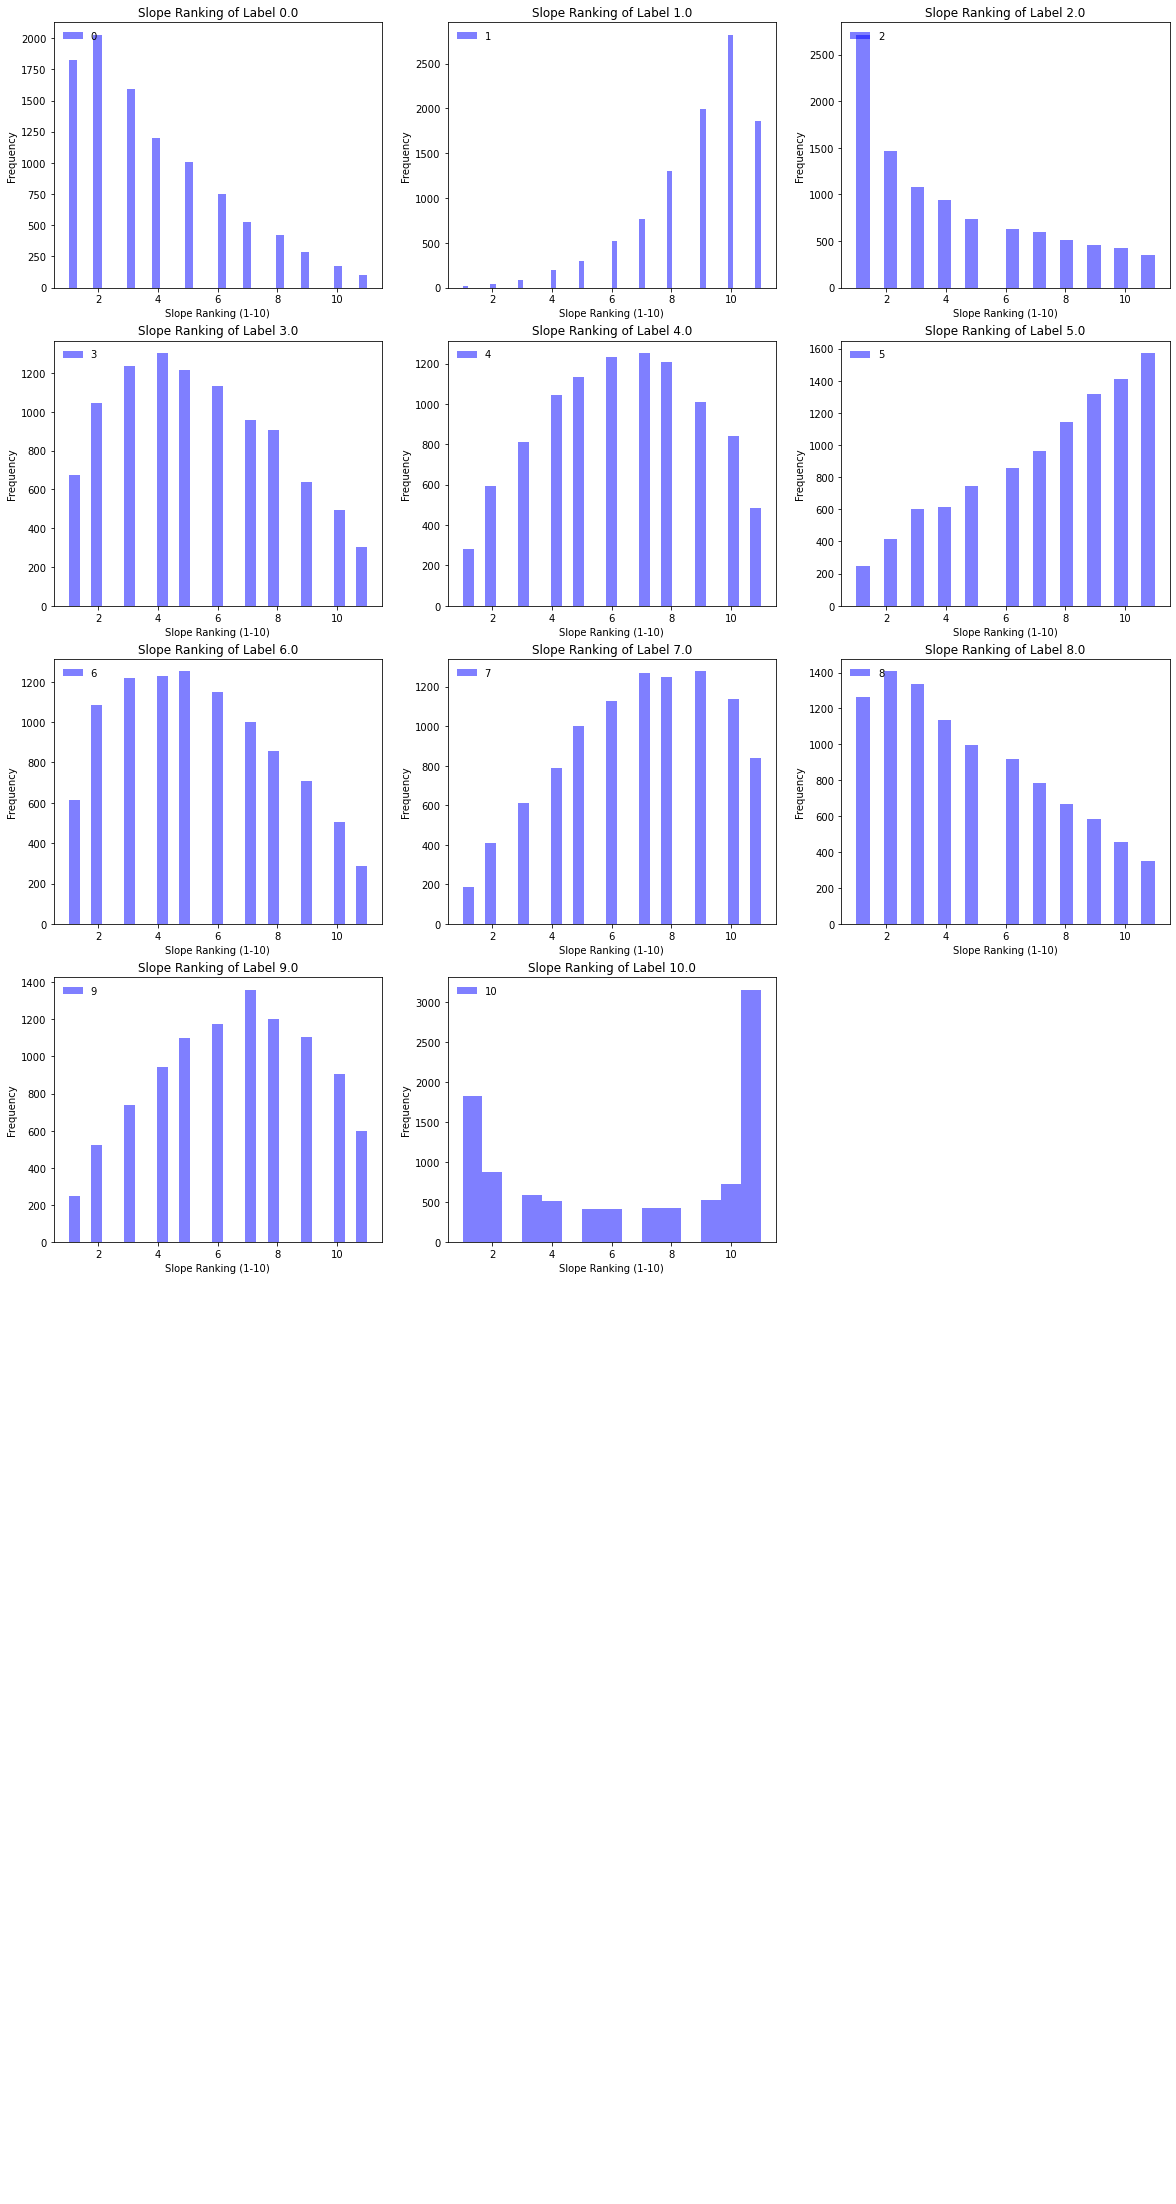

In [76]:
compare = pd.DataFrame([])
compare.insert(loc=0, column="Label 0", value=np.array(label0[len(label0) - 1]["Average Slope"]))
compare.insert(loc=1, column="Label 1", value=np.array(label1[len(label1) - 1]["Average Slope"]))
compare.insert(loc=2, column="Label 2", value=np.array(label2[len(label2) - 1]["Average Slope"]))
compare.insert(loc=3, column="Label 3", value=np.array(label3[len(label3) - 1]["Average Slope"]))
compare.insert(loc=4, column="Label 4", value=np.array(label4[len(label4) - 1]["Average Slope"]))
compare.insert(loc=5, column="Label 5", value=np.array(label5[len(label5) - 1]["Average Slope"]))
compare.insert(loc=6, column="Label 6", value=np.array(label6[len(label6) - 1]["Average Slope"]))
compare.insert(loc=7, column="Label 7", value=np.array(label7[len(label7) - 1]["Average Slope"]))
compare.insert(loc=8, column="Label 8", value=np.array(label8[len(label8) - 1]["Average Slope"]))
compare.insert(loc=9, column="Label 9", value=np.array(label9[len(label9) - 1]["Average Slope"]))
compare.insert(loc=10, column="Single instance 0", value=np.array(label1[var]["slope"]))
compare = compare.T
#print(compare)
#print(compare[1].rank())
ranking = pd.DataFrame([])
for x in range(len(compare.columns)):
    ranking.insert(loc=x, column="Edge " + str(x + 1), value=np.array(compare[x].rank()))
ranking = ranking.T

ncols = 3
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))

counter = 0
a = []
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(ranking.columns):
            ax.hist(ranking[ranking.columns[counter]], bins='auto', color='blue', alpha=0.5, label='{}'.format(ranking.columns[counter]))
            temp, b = np.histogram(ranking[ranking.columns[counter]], bins=np.arange(11), density=True)
            a.append(temp)
            ax.set_xlabel('Slope Ranking (1-10)')
            ax.set_ylabel('Frequency')
            ax.set_title("Slope Ranking of Label " + str(truncate(float(ranking.columns[counter]), 0)))
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)
        else:
            ax.set_axis_off()
        counter+=1
plt.show()

In [79]:
#kl_divergence(a[10], a[0])
for i in range(10):
    print(i, kl_divergence(a[i], a[10]))


0 0.1636281224153548
1 0.8024906416140962
2 0.03995241282741259
3 0.2121707982128284
4 0.31009112933728333
5 0.32033394411643246
6 0.21560398727319352
7 0.3606887478741446
8 0.11099704400544172
9 0.3276490878951227


In [75]:
0 0.4457884862672883
1 2.0406441004013933
2 0.2827359897890644
3 0.9057973058016698
4 1.2914668666704137
5 1.6289313694529493
6 1.0223243926629006
7 1.4054169708184745
8 0.474831440152416
9 1.3399705192801674

1

In [16]:
ranking

,0,1,2,3,4,5,6,7,8,9
Edge 1,1.0,10.0,5.0,7.0,6.0,4.0,2.0,8.0,9.0,3.0
Edge 2,2.0,10.0,6.0,1.0,9.0,5.0,4.0,8.0,3.0,7.0
Edge 3,6.0,10.0,3.0,5.0,9.0,4.0,1.0,8.0,2.0,7.0
Edge 4,2.0,10.0,1.0,9.0,7.0,8.0,3.0,6.0,4.0,5.0
Edge 5,7.0,9.0,1.0,4.0,10.0,3.0,2.0,8.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...
Edge 9896,7.0,10.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,9.0
Edge 9897,2.0,10.0,1.0,3.0,6.0,8.0,7.0,9.0,4.0,5.0
Edge 9898,2.0,7.0,1.0,5.0,9.0,10.0,4.0,8.0,3.0,6.0
Edge 9899,5.0,8.0,1.0,3.0,10.0,7.0,4.0,2.0,9.0,6.0


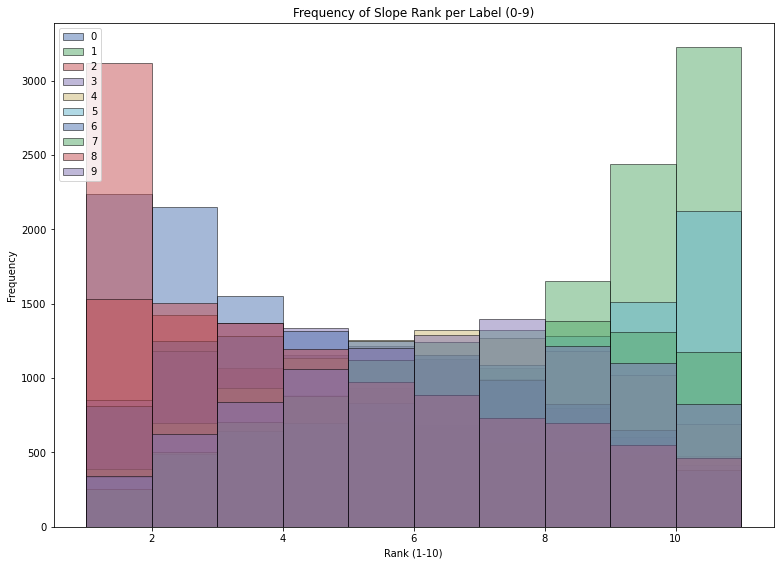

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
bins = np.linspace(1, 11, 11)

plt.hist(ranking[ranking.columns[0]], bins, alpha=0.5, label='{}'.format(ranking.columns[0]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[1]], bins, alpha=0.5, label='{}'.format(ranking.columns[1]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[2]], bins, alpha=0.5, label='{}'.format(ranking.columns[2]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[3]], bins, alpha=0.5, label='{}'.format(ranking.columns[3]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[4]], bins, alpha=0.5, label='{}'.format(ranking.columns[4]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[5]], bins, alpha=0.5, label='{}'.format(ranking.columns[5]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[6]], bins, alpha=0.5, label='{}'.format(ranking.columns[6]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[7]], bins, alpha=0.5, label='{}'.format(ranking.columns[7]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[8]], bins, alpha=0.5, label='{}'.format(ranking.columns[8]), edgecolor = 'k')
plt.hist(ranking[ranking.columns[9]], bins, alpha=0.5, label='{}'.format(ranking.columns[9]), edgecolor = 'k')
set_size(10,7)

plt.title("Frequency of Slope Rank per Label (0-9)")
plt.xlabel("Rank (1-10)")
plt.ylabel("Frequency")

plt.legend(loc='upper left')
plt.show()

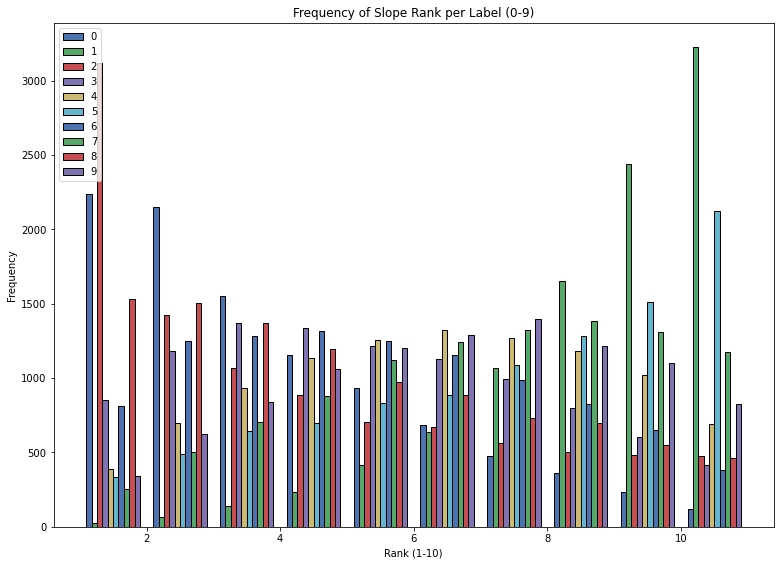

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')
bins = np.linspace(1, 11, 11)

plt.hist([ranking[ranking.columns[0]],
          ranking[ranking.columns[1]],
          ranking[ranking.columns[2]],
          ranking[ranking.columns[3]],
          ranking[ranking.columns[4]],
          ranking[ranking.columns[5]],
          ranking[ranking.columns[6]],
          ranking[ranking.columns[7]],
          ranking[ranking.columns[8]],
          ranking[ranking.columns[9]]],
          bins, label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], edgecolor = 'k')
plt.legend(loc='upper left')
plt.title("Frequency of Slope Rank per Label (0-9)")
plt.xlabel("Rank (1-10)")
plt.ylabel("Frequency")
set_size(10,7)
plt.show()

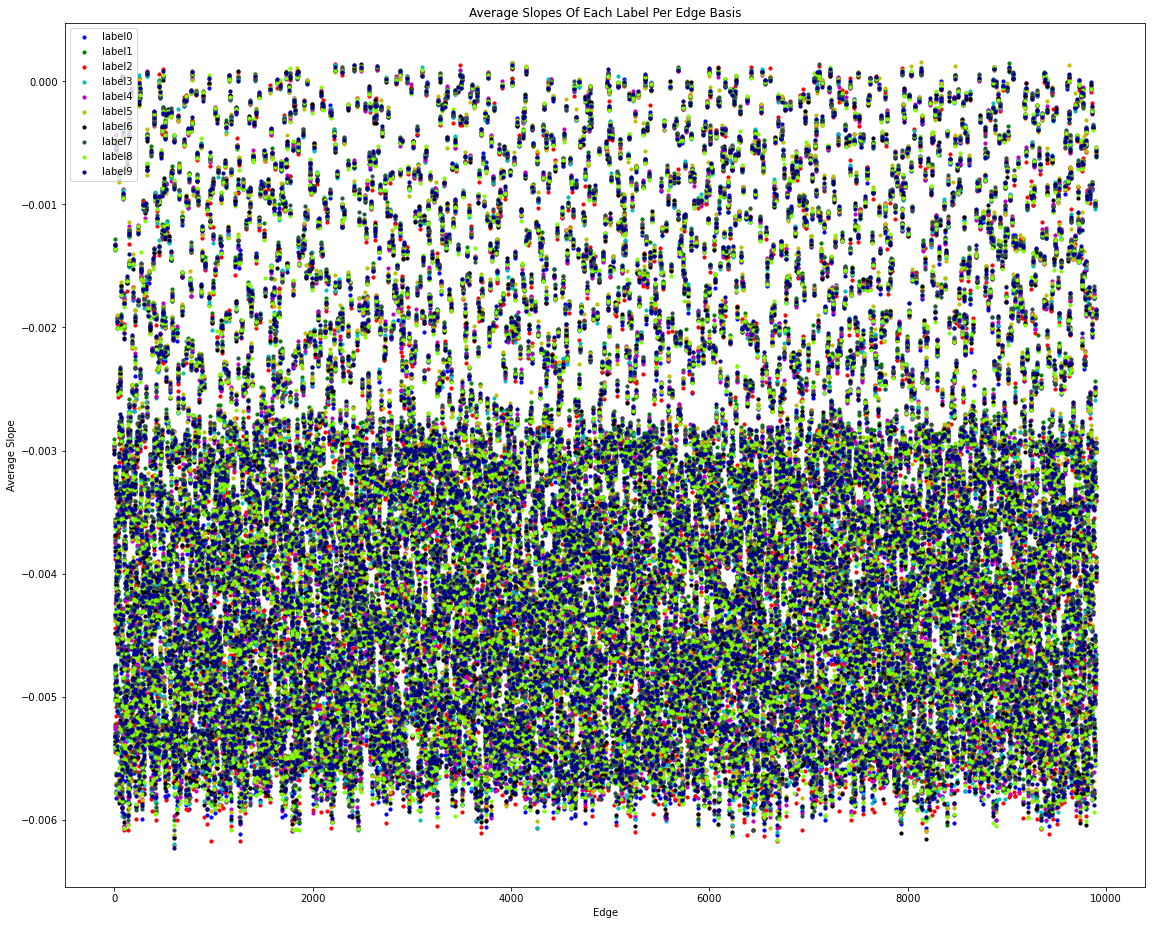

In [10]:
import matplotlib.pyplot as plt

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(np.array(label0[len(label0) - 1]["Edge"]), np.array(label0[len(label0) - 1]["Average Slope"]), s=10, c='b', marker="o", label='label0')
ax1.scatter(np.array(label1[len(label1) - 1]["Edge"]), np.array(label1[len(label1) - 1]["Average Slope"]), s=10, c='g', marker="o", label='label1')
ax1.scatter(np.array(label2[len(label2) - 1]["Edge"]), np.array(label2[len(label2) - 1]["Average Slope"]), s=10, c='r', marker="o", label='label2')
ax1.scatter(np.array(label3[len(label3) - 1]["Edge"]), np.array(label3[len(label3) - 1]["Average Slope"]), s=10, c='c', marker="o", label='label3')
ax1.scatter(np.array(label4[len(label4) - 1]["Edge"]), np.array(label4[len(label4) - 1]["Average Slope"]), s=10, c='m', marker="o", label='label4')
ax1.scatter(np.array(label5[len(label5) - 1]["Edge"]), np.array(label5[len(label5) - 1]["Average Slope"]), s=10, c='y', marker="o", label='label5')
ax1.scatter(np.array(label6[len(label6) - 1]["Edge"]), np.array(label6[len(label6) - 1]["Average Slope"]), s=10, c='k', marker="o", label='label6')
ax1.scatter(np.array(label7[len(label7) - 1]["Edge"]), np.array(label7[len(label7) - 1]["Average Slope"]), s=10, c='DarkSlateGray', marker="o", label='label7')
ax1.scatter(np.array(label8[len(label8) - 1]["Edge"]), np.array(label8[len(label8) - 1]["Average Slope"]), s=10, c='chartreuse', marker="o", label='label8')
ax1.scatter(np.array(label9[len(label9) - 1]["Edge"]), np.array(label9[len(label9) - 1]["Average Slope"]), s=10, c='DarkBlue', marker="o", label='label9')
set_size(15,12)
plt.title("Average Slopes Of Each Label Per Edge Basis")
plt.xlabel("Edge")
plt.ylabel("Average Slope")
plt.legend(loc='upper left');
#plt.savefig('AvrgSlopeVsEdge.jpeg', bbox_inches='tight', dpi=500)
plt.show()

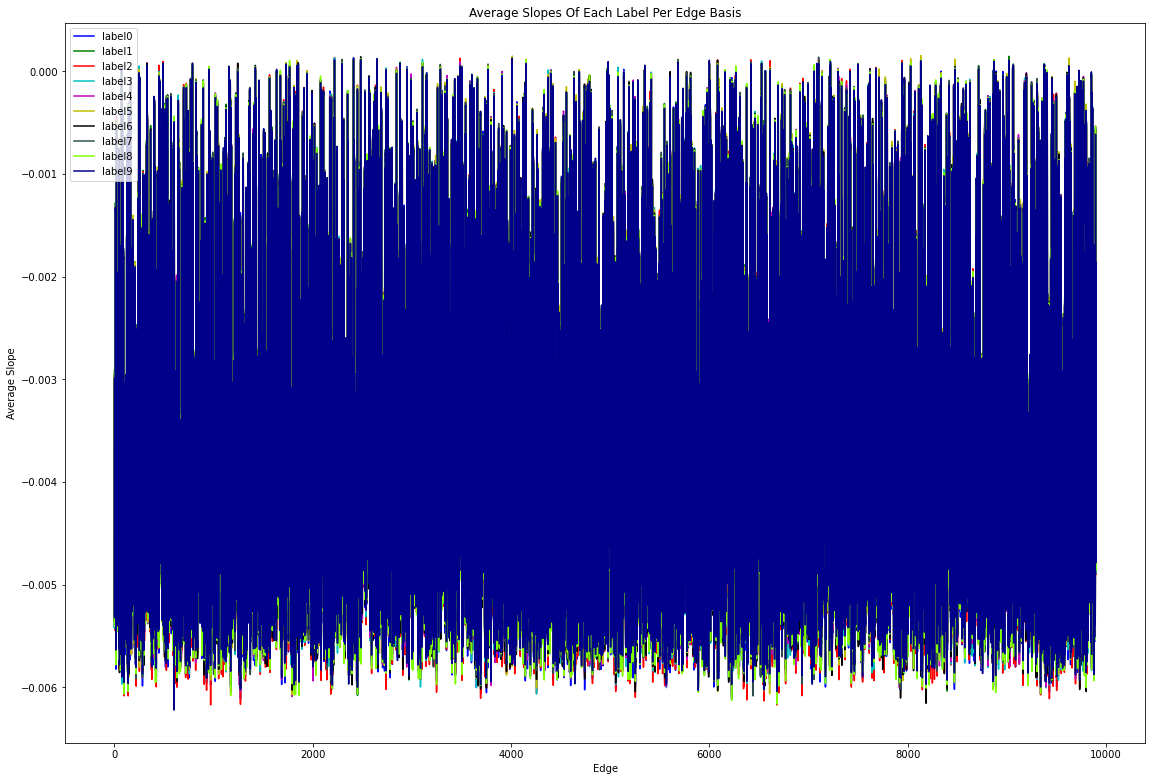

In [9]:
import matplotlib.pyplot as plt

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(np.array(label0[len(label0) - 1]["Edge"]), np.array(label0[len(label0) - 1]["Average Slope"]), c='b', label='label0')
ax1.plot(np.array(label1[len(label1) - 1]["Edge"]), np.array(label1[len(label1) - 1]["Average Slope"]), c='g', label='label1')
ax1.plot(np.array(label2[len(label2) - 1]["Edge"]), np.array(label2[len(label2) - 1]["Average Slope"]), c='r', label='label2')
ax1.plot(np.array(label3[len(label3) - 1]["Edge"]), np.array(label3[len(label3) - 1]["Average Slope"]), c='c', label='label3')
ax1.plot(np.array(label4[len(label4) - 1]["Edge"]), np.array(label4[len(label4) - 1]["Average Slope"]), c='m', label='label4')
ax1.plot(np.array(label5[len(label5) - 1]["Edge"]), np.array(label5[len(label5) - 1]["Average Slope"]), c='y', label='label5')
ax1.plot(np.array(label6[len(label6) - 1]["Edge"]), np.array(label6[len(label6) - 1]["Average Slope"]), c='k', label='label6')
ax1.plot(np.array(label7[len(label7) - 1]["Edge"]), np.array(label7[len(label7) - 1]["Average Slope"]), c='DarkSlateGray', label='label7')
ax1.plot(np.array(label8[len(label8) - 1]["Edge"]), np.array(label8[len(label8) - 1]["Average Slope"]), c='chartreuse', label='label8')
ax1.plot(np.array(label9[len(label9) - 1]["Edge"]), np.array(label9[len(label9) - 1]["Average Slope"]), c='DarkBlue', label='label9')
set_size(15,10)
plt.title("Average Slopes Of Each Label Per Edge Basis")
plt.xlabel("Edge")
plt.ylabel("Average Slope")
plt.legend(loc='upper left');
#plt.savefig('AvrgSlopeVsEdge.jpeg', bbox_inches='tight', dpi=500)
plt.show()

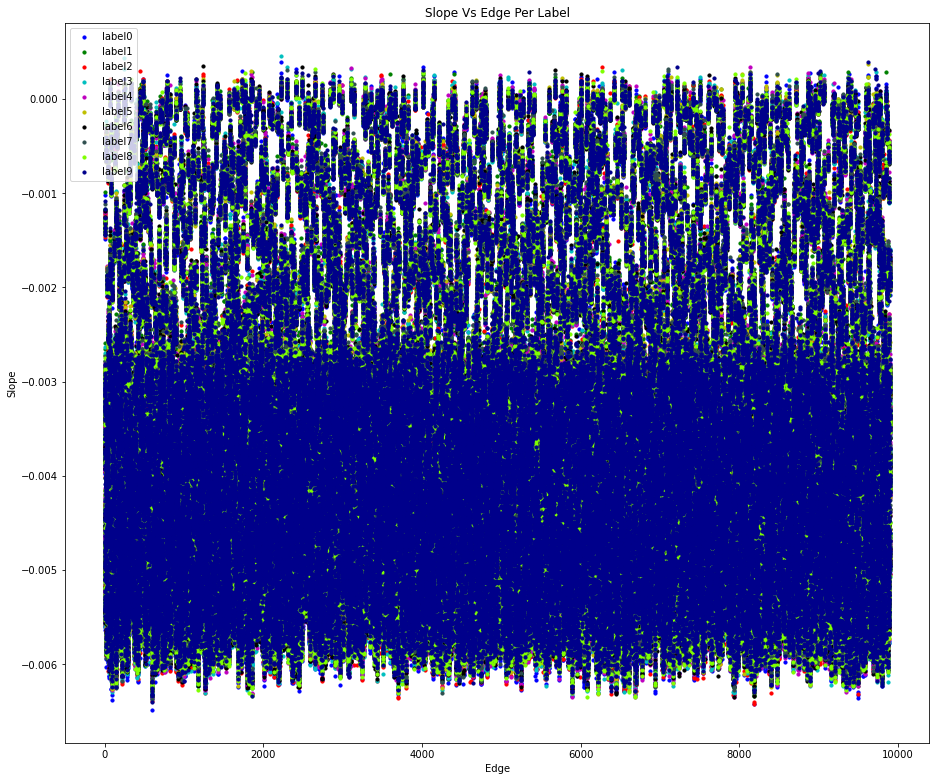

In [33]:
import matplotlib.pyplot as plt

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig = plt.figure()
ax1 = fig.add_subplot(111)

label0_combined = pd.DataFrame([])
for x in range(len(label0)):
    label0_combined = label0_combined.append(label0[x].T)
label0_combined = label0_combined.T
ax1.scatter(np.array(label0_combined["edge"]), np.array(label0_combined["slope"]), 
            s=10, c='b', marker="o", label='label0')

label1_combined = pd.DataFrame([])
for x in range(len(label1)):
    label1_combined = label1_combined.append(label1[x].T)
label1_combined = label1_combined.T
ax1.scatter(np.array(label1_combined["edge"]), np.array(label1_combined["slope"]), 
            s=10, c='g', marker="o", label='label1')        

label2_combined = pd.DataFrame([])
for x in range(len(label2)):
    label2_combined = label2_combined.append(label2[x].T)
label2_combined = label2_combined.T
ax1.scatter(np.array(label2_combined["edge"]), np.array(label2_combined["slope"]), 
            s=10, c='r', marker="o", label='label2') 

label3_combined = pd.DataFrame([])
for x in range(len(label3)):
    label3_combined = label3_combined.append(label3[x].T)
label3_combined = label3_combined.T
ax1.scatter(np.array(label3_combined["edge"]), np.array(label3_combined["slope"]), 
            s=10, c='c', marker="o", label='label3')  

label4_combined = pd.DataFrame([])
for x in range(len(label4)):
    label4_combined = label4_combined.append(label4[x].T)
label4_combined = label4_combined.T
ax1.scatter(np.array(label4_combined["edge"]), np.array(label4_combined["slope"]), 
            s=10, c='m', marker="o", label='label4')  

label5_combined = pd.DataFrame([])
for x in range(len(label5)):
    label5_combined = label5_combined.append(label5[x].T)
label5_combined = label5_combined.T
ax1.scatter(np.array(label5_combined["edge"]), np.array(label5_combined["slope"]), 
            s=10, c='y', marker="o", label='label5')     

label6_combined = pd.DataFrame([])
for x in range(len(label6)):
    label6_combined = label6_combined.append(label6[x].T)
label6_combined = label6_combined.T
ax1.scatter(np.array(label6_combined["edge"]), np.array(label6_combined["slope"]), 
            s=10, c='k', marker="o", label='label6')  

label7_combined = pd.DataFrame([])
for x in range(len(label7)):
    label7_combined = label7_combined.append(label7[x].T)
label7_combined = label7_combined.T
ax1.scatter(np.array(label7_combined["edge"]), np.array(label7_combined["slope"]), 
            s=10, c='DarkSlateGray', marker="o", label='label7')  

label8_combined = pd.DataFrame([])
for x in range(len(label8)):
    label8_combined = label8_combined.append(label8[x].T)
label8_combined = label8_combined.T
ax1.scatter(np.array(label8_combined["edge"]), np.array(label8_combined["slope"]), 
            s=10, c='chartreuse', marker="o", label='label8')  

label9_combined = pd.DataFrame([])
for x in range(len(label9)):
    label9_combined = label9_combined.append(label9[x].T)
label9_combined = label9_combined.T
ax1.scatter(np.array(label9_combined["edge"]), np.array(label9_combined["slope"]), 
            s=10, c='DarkBlue', marker="o", label='label9')  

set_size(12,10)
plt.title("Slope Vs Edge Per Label")
plt.xlabel("Edge")
plt.ylabel("Slope")
plt.legend(loc='upper left');
#plt.savefig('AvrgSlopeVsEdge.jpeg', bbox_inches='tight', dpi=500)
plt.show()